In [13]:
from utils import ModelImporter, Preprocessing, Metrics
import torch
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import torchsummary

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%reload_ext autoreload

# Analize Model with the Public Test Data

In [35]:
#load data
pre = Preprocessing('fer2013')
pre.load_data(filename='test_public_norm.csv.gz', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [36]:
dtype = torch.float
device = torch.device("cpu")

n_classes = 7
n_epochs = 100
learning_rate = 0.001
batch_size = 64

#loss_ep_n = 10
acc_ep_n = 60
#f1_ep_n = 20
#bs_ep_n = 25

m_importer = ModelImporter('fer2013_DatasetE')

In [37]:
model_name = f'cnn_multi8_layer_E_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{acc_ep_n}'
model = m_importer.load_nn_model(model_name)

['cnn_multi8_layer_E_bs_0.001_64_100_7', 1, 7, [48, 48], 64, 64, 128, 128, 256, 256, 512, 512, 2]
load model CnnMulti8Layer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.4)
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, k

In [38]:
torchsummary.summary(model, (1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]             640
       BatchNorm2d-2           [-1, 64, 48, 48]             128
            Conv2d-3           [-1, 64, 48, 48]          36,928
       BatchNorm2d-4           [-1, 64, 48, 48]             128
         MaxPool2d-5           [-1, 64, 24, 24]               0
            Conv2d-6          [-1, 128, 24, 24]          73,856
       BatchNorm2d-7          [-1, 128, 24, 24]             256
            Conv2d-8          [-1, 128, 24, 24]         147,584
       BatchNorm2d-9          [-1, 128, 24, 24]             256
        MaxPool2d-10          [-1, 128, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         295,168
      BatchNorm2d-12          [-1, 256, 12, 12]             512
           Conv2d-13          [-1, 256, 12, 12]         590,080
      BatchNorm2d-14          [-1, 256,

In [39]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [40]:
y_pred_prob = None
with torch.no_grad():
    y_pred_prob = model(X_test)
y_pred = y_pred_prob.argmax(1)
accuracy_soft = (y_pred == y_test).float().mean()
del model
accuracy_soft

tensor(0.6673)

In [41]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
labels_num = [0, 1, 2, 3, 4, 5, 6]
metrics = Metrics(y_test, y_pred, labels_num, labels)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

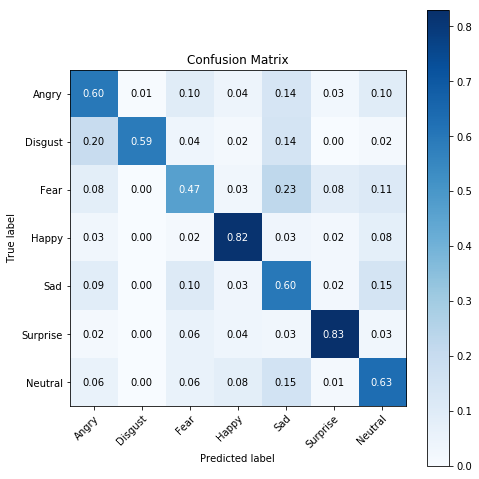

In [42]:
metrics.represent_cm()

In [43]:
metrics.balanced_score()

0.6474680652405603